In [1]:
# autoreload magic
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_psf_and_image
from utils import plot_image
from utils import to_absolute_path
import numpy as np


In [3]:
image_name = 'im172.npy'

ORIGINAL_IMAGE = f"data/lensed/{image_name}"
DIFFUSER_IMAGE = f"data/diffuser/{image_name}"
PSF = "data/psf.tiff"

psf, image = load_psf_and_image(psf_fp=to_absolute_path(PSF),
                                data_fp=to_absolute_path(DIFFUSER_IMAGE),
                                downsample=4, flip=True, normalize=True)

psf.shape

(1, 270, 480, 3)

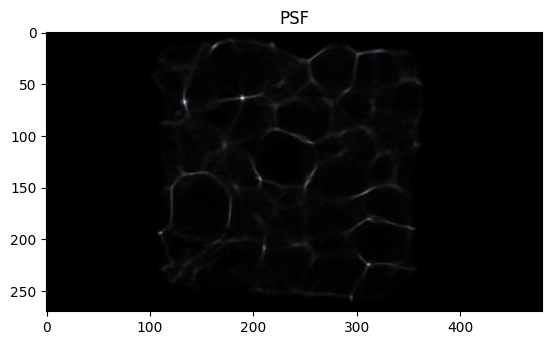

In [4]:
from matplotlib import pyplot as plt

# plt.imshow(psf[0])  # will show a black image, needs gamma correction
plot_image(psf[0])
plt.title("PSF")
plt.show()

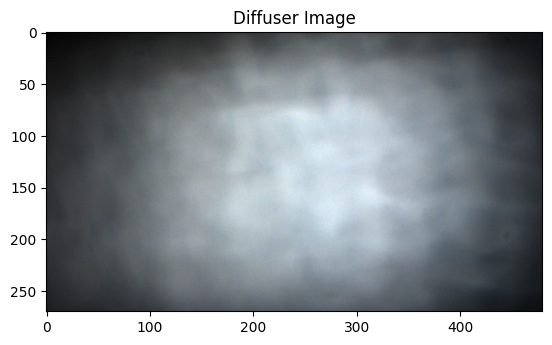

In [5]:
plot_image(image)
plt.title("Diffuser Image")
plt.show()

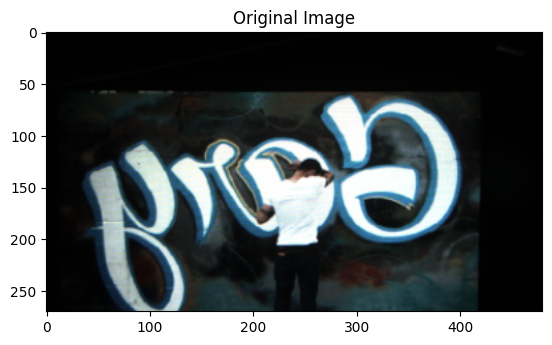

In [6]:
from utils import load_image

original = load_image(to_absolute_path(ORIGINAL_IMAGE))  #, shape=reconstructed.shape)
plot_image(original)
plt.title('Original Image')
plt.show()

100%|██████████| 500/500 [01:14<00:00,  6.72it/s]


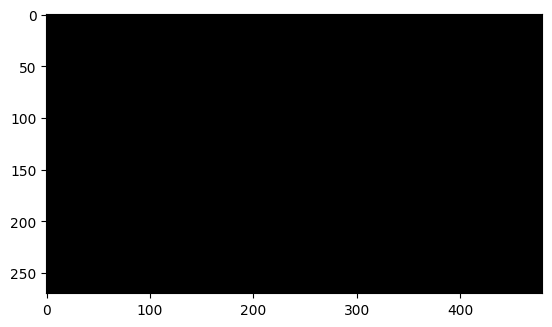

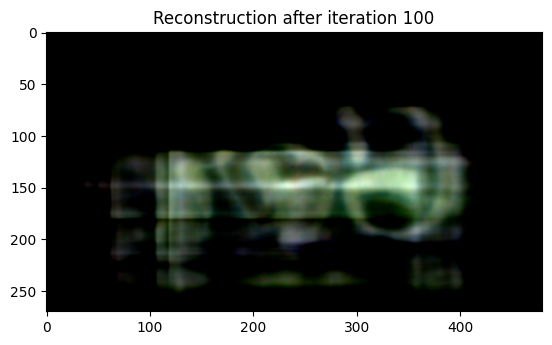

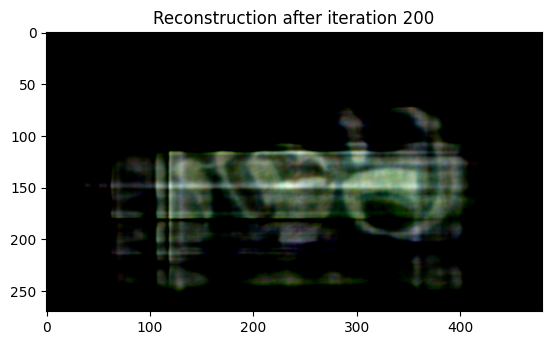

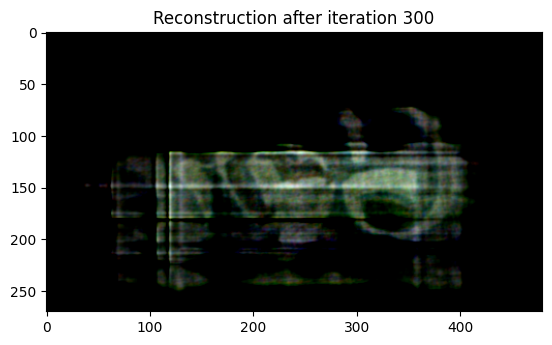

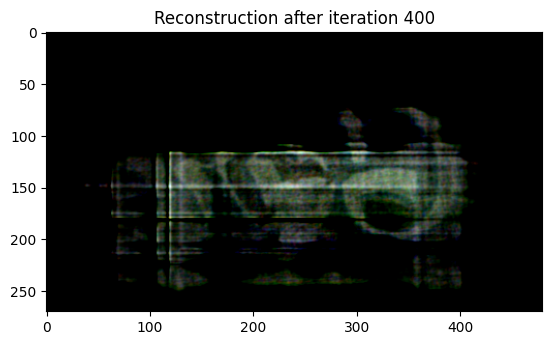

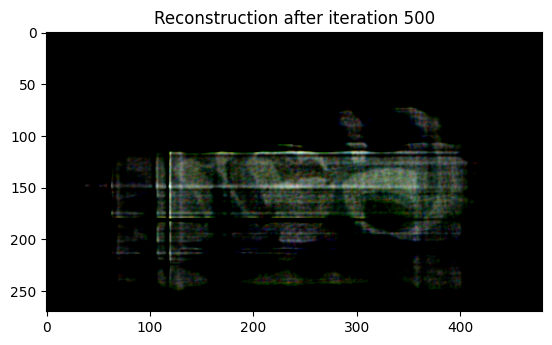

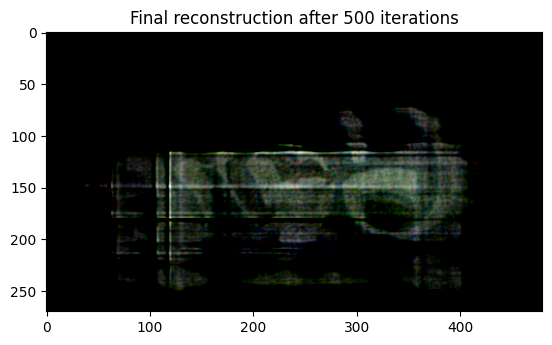

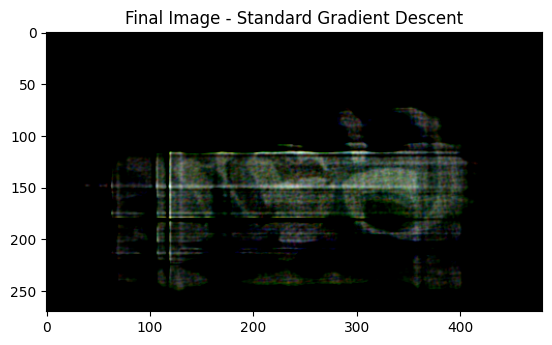

In [9]:
# from algorithms.nesterov import nesterov_gradient_descent
from algorithms.fista import FISTA
# from algorithms.gradient_descent import gradient_descent
# reconstructor = nesterov_gradient_descent(psf, gt=original)
reconstructor = FISTA(psf, gt=original)
# reconstructor = gradient_descent(psf, gt=original)
reconstructed, ax, evals = reconstructor.apply(image, n_iter=500, disp_iter=100, eval_iter=5)
plot_image(reconstructed).set_title("Final Image - Standard Gradient Descent")
plt.show()

Text(0.5, 0, 'Iteration')

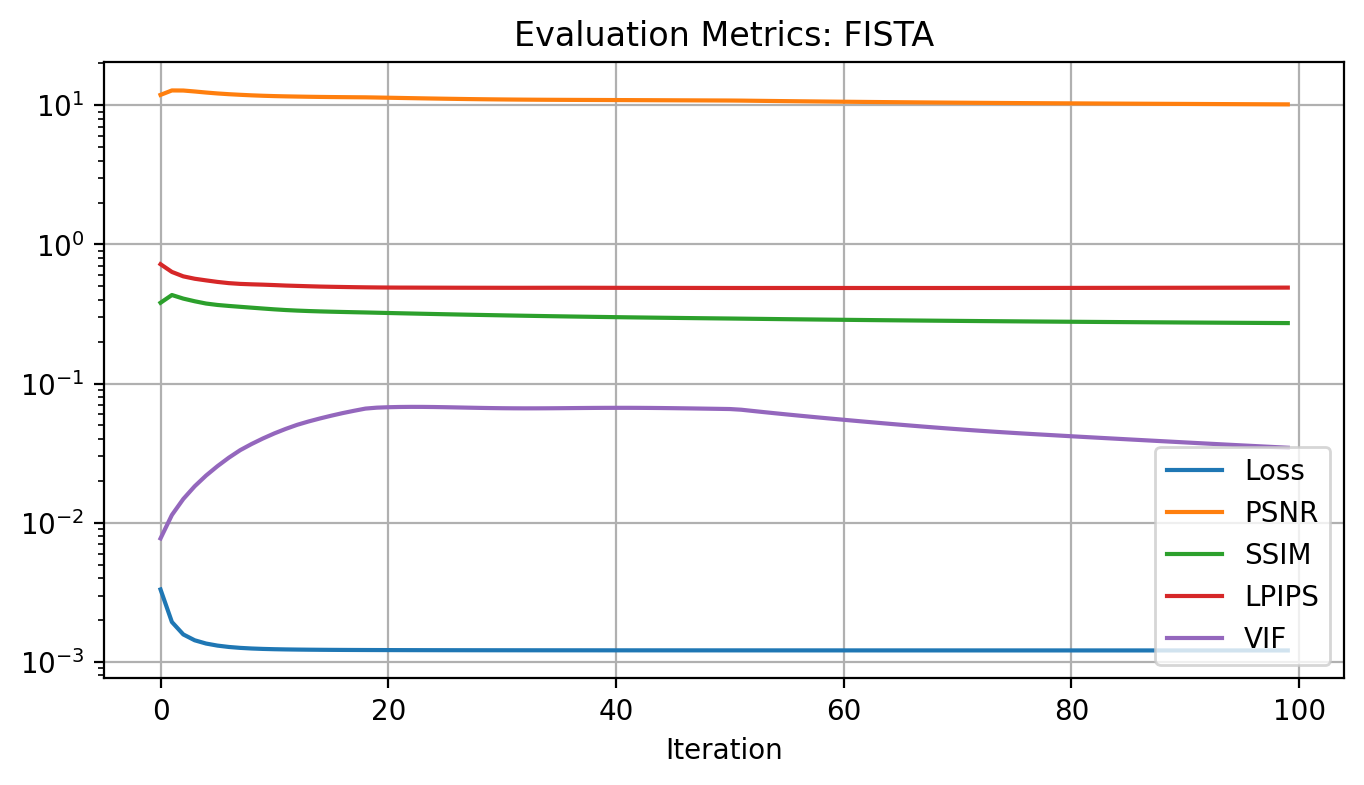

In [11]:
plt.figure(figsize=(8, 4), dpi=200)

eval_names = ['Loss', 'PSNR', 'SSIM', 'LPIPS', 'VIF']
for i, e in enumerate(evals):
    plt.plot(evals[i], label=eval_names[i])
    
plt.legend()
plt.yscale('log')
plt.grid()
plt.title('Evaluation Metrics: FISTA')
plt.xlabel('Iteration')

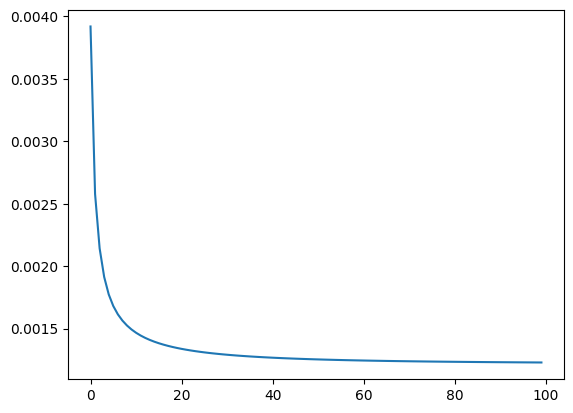

In [62]:
plt.plot(evals[0])

(0.0, 10.0)

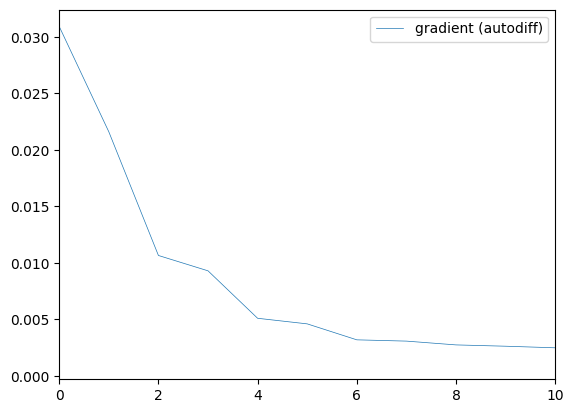

In [58]:
plt.plot([np.linalg.norm(g) for g in reconstructor._grad_history], label='gradient (autodiff)', linewidth=0.5)
plt.legend()
plt.xlim(0, 10)


(0.0, 10.0)

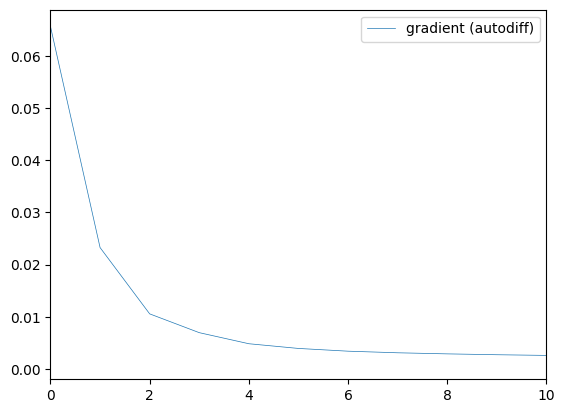

In [59]:
plt.plot(reconstructor._losses_history, label='gradient (autodiff)', linewidth=0.5)
plt.legend()
plt.xlim(0, 10)


In [24]:
import numpy as np
np.linalg.norm(reconstructor._grad_history[0])

0.030922012

In [84]:
reconstructor._grad_history[0]

array([[[[-2.9559857e-12, -2.4505552e-12,  8.7537503e-12],
         [-2.9567705e-12, -2.4502280e-12,  8.7601783e-12],
         [-2.9570508e-12, -2.4498233e-12,  8.7656939e-12],
         ...,
         [-2.9506185e-12, -2.4484139e-12,  8.7312345e-12],
         [-2.9525091e-12, -2.4494992e-12,  8.7393929e-12],
         [-2.9544073e-12, -2.4503260e-12,  8.7469086e-12]],

        [[-1.6928078e-12, -2.8408502e-12,  7.0329623e-12],
         [-1.6971455e-12, -2.8423735e-12,  7.0422895e-12],
         [-1.7017334e-12, -2.8436429e-12,  7.0509735e-12],
         ...,
         [-1.6812957e-12, -2.8325929e-12,  7.0033237e-12],
         [-1.6850310e-12, -2.8354680e-12,  7.0135460e-12],
         [-1.6888799e-12, -2.8383877e-12,  7.0233958e-12]],

        [[-4.6217483e-12, -5.7571651e-12,  4.1729914e-12],
         [-4.6290610e-12, -5.7550327e-12,  4.1828234e-12],
         [-4.6365351e-12, -5.7527186e-12,  4.1918352e-12],
         ...,
         [-4.5981591e-12, -5.7608913e-12,  4.1461929e-12],
         [